Problem Statement:

The agricultural sector faces challenges in assessing and understanding the performance of crops over the years. Farmers and policymakers need a reliable method to evaluate the Crop Performance Index (CPI) based on factors such as land area and production.

Objective:

This project aimed to analyze the Crop Productivity Index (CPI) using statistical techniques and machine learning, with a focus on creating a predictive model using Random Forest Regression. The goal was not only to forecast CPI values but also to identify influential factors through feature engineering. By incorporating robust error handling, the objective was to enhance the accuracy of predictions and offer actionable insights for optimizing agricultural productivity.

URL of Dataset used:https://drive.google.com/drive/folders/1DJVCG3rHF-rQ7FCa1mUM9vAblIihfC6Q?usp=sharing

1. Import the Libraries

In [34]:
import numpy as np # for numerical operation
import pandas as pd # for data manipulation
from sklearn import tree # for machine learning
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.ensemble import RandomForestRegressor #used to build RandomForestRegressor model
from sklearn.model_selection import train_test_split #function helps in splitting the dataset into training and testing sets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



2. Load the Dataset

In [35]:
agr = pd.read_csv("AgrcultureDataset.csv", encoding="ISO-8859-1")


3. Check the data type of each column

In [36]:
agr.dtypes


State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

4. Displaying first few row of dataset

In [37]:
agr.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


5. Convert the Column from Object to Numeric

In [38]:
agr['State_Name'] = pd.to_numeric(agr['State_Name'], errors='coerce')
agr['District_Name'] = pd.to_numeric(agr['District_Name'], errors='coerce')
agr['Season'] = pd.to_numeric(agr['Season'], errors='coerce')
agr['Crop'] = pd.to_numeric(agr['Crop'], errors='coerce')
agr['Production'] = pd.to_numeric(agr['Production'], errors='coerce')

6. Grouping Data by Crop_Year and Calculating Mean of Area and Production:

In [39]:
data = agr.groupby(['Crop_Year'])['Area', 'Production'].mean()
data = data.reset_index(level=0, inplace=False)
print(data)
# helps analyze the average values of "Area" and "Production" for different crop years in the dataset

    Crop_Year          Area    Production
0        1997  26038.324081  9.565489e+04
1        1998  14479.153906  5.172545e+05
2        1999  12678.074790  5.172145e+05
3        2000  12102.612169  5.496723e+05
4        2001  12371.499489  5.616144e+05
5        2002   9463.680476  4.654666e+05
6        2003   9954.769395  4.619857e+05
7        2004  11891.933465  5.909555e+05
8        2005  11822.333236  5.949085e+05
9        2006  11913.672644  6.211571e+05
10       2007  10513.848637  4.821251e+05
11       2008  11768.527148  5.423063e+05
12       2009  11738.077997  5.564389e+05
13       2010  12557.355280  4.573050e+05
14       2011  10918.140920  1.037554e+06
15       2012  11369.858240  6.197705e+05
16       2013  10368.125223  9.575947e+05
17       2014  10549.306622  8.011596e+05
18       2015   8187.362989  1.236197e+04


C:\Users\RICHA\AppData\Local\Temp\ipykernel_18720\4149017156.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = agr.groupby(['Crop_Year'])['Area', 'Production'].mean()


7. Calculating Crop Performance Index (CPI):

In [40]:
data['CPI'] = data['Production'] / data['Area']
print(data['CPI'])
#This step is performed to create a new column, 'CPI', which represents the efficiency or productivity of crop production in terms of the area utilized.


0      3.673619
1     35.724086
2     40.795984
3     45.417661
4     45.395827
5     49.184519
6     46.408482
7     49.693814
8     50.320732
9     52.138173
10    45.856191
11    46.081067
12    47.404599
13    36.417306
14    95.030260
15    54.509962
16    92.359485
17    75.944286
18     1.509884
Name: CPI, dtype: float64


8. Displaying Summary Statistics:

In [41]:
data.describe()
# to get an overview of the central tendency, dispersion, and shape of the distribution of each numerical column in your dataset.

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.496053e+05,48.098207
std,5.627314,3633.397954,2.364676e+05,22.993961
min,1997.000000,8187.362989,1.236197e+04,1.509884
25%,2001.500000,10531.577629,4.737958e+05,43.095905
50%,2006.000000,11768.527148,5.496723e+05,46.408482
75%,2010.500000,12237.055829,6.073395e+05,51.229452
max,2015.000000,26038.324081,1.037554e+06,95.030260


9. Boxplot for CPI:

<AxesSubplot: xlabel='CPI'>

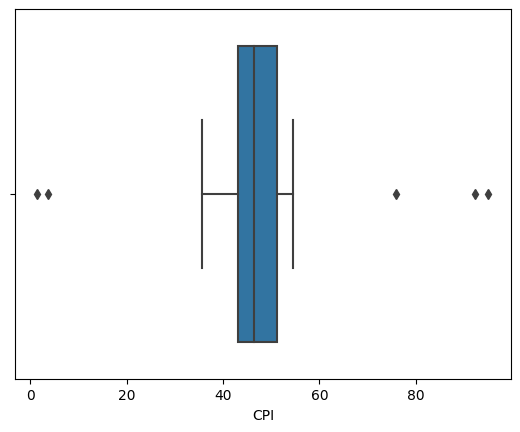

In [42]:
sns.boxplot(x=data['CPI'])

10. Filtering Data Based on CPI Range:

In [43]:
data = data[np.isfinite(data['CPI'])] # remove the line where CPI value is not finite value.
data = data[data.CPI > 40] #filter to include those row where CPI value >40.
data = data[data.CPI < 70] #filter to include those row where CPI value <70.
data.set_index('Crop_Year') # set the column as Index of the dataframe

,Area,Production,CPI
Crop_Year,,,
1999,12678.074790,517214.531396,40.795984
2000,12102.612169,549672.332849,45.417661
2001,12371.499489,561614.446722,45.395827
2002,9463.680476,465466.567649,49.184519
2003,9954.769395,461985.734566,46.408482
2004,11891.933465,590955.527122,49.693814
2005,11822.333236,594908.463112,50.320732
2006,11913.672644,621157.124117,52.138173
2007,10513.848637,482125.050009,45.856191


11. Histogram Plotting:

array([[<AxesSubplot: title={'center': 'Crop_Year'}>,
        <AxesSubplot: title={'center': 'Area'}>],
       [<AxesSubplot: title={'center': 'Production'}>,
        <AxesSubplot: title={'center': 'CPI'}>]], dtype=object)

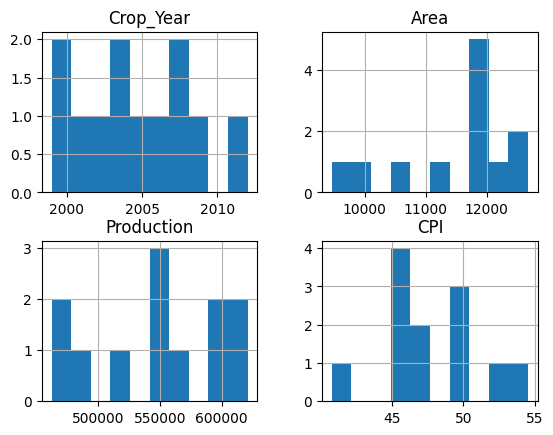

In [44]:
data.hist()
#to get a better Visualization for analysing the data
#bimodal distribution

12. Correlation Heatmap:

<AxesSubplot: >

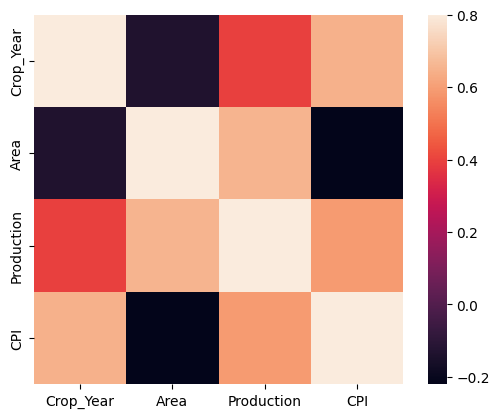

In [45]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)


13. Scatterplot Matrix:

c:\python37\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


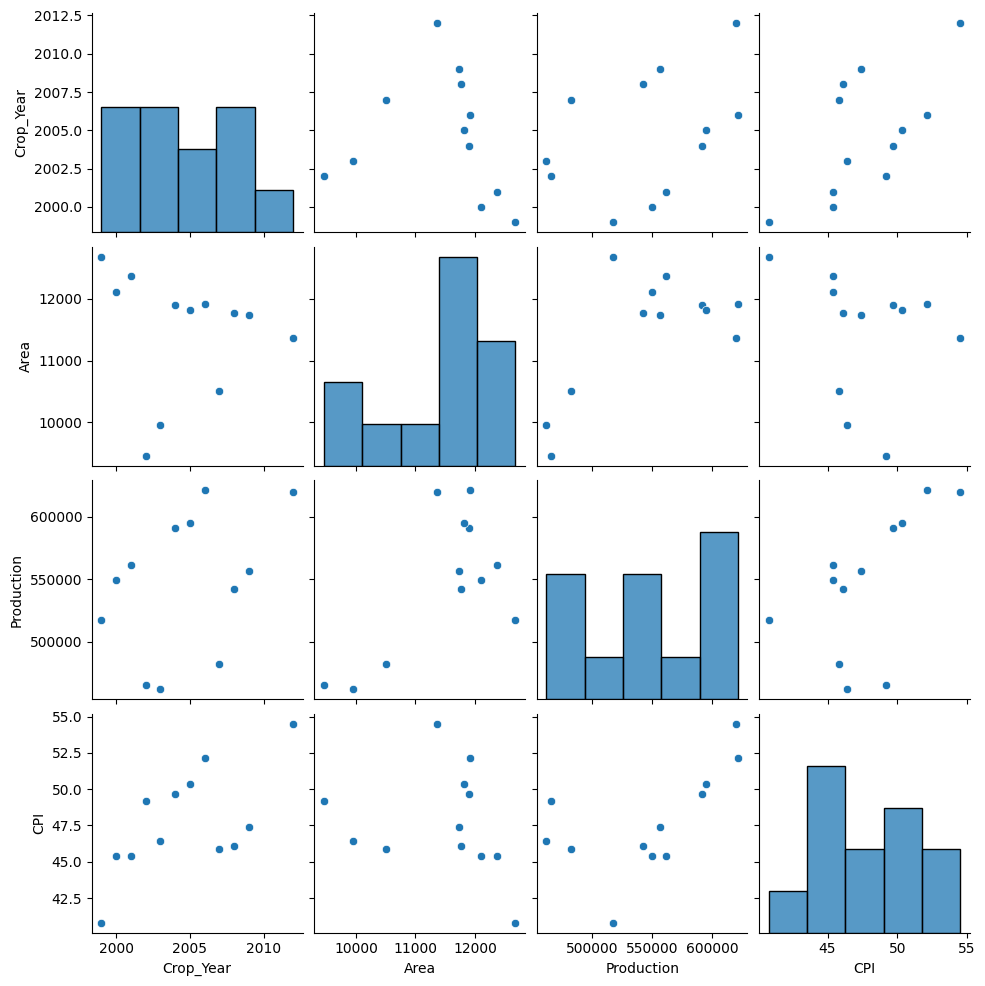

In [46]:
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size=2.5)
#representation of the relationships between different pairs of variables in the dataset.

14. Line Plot for Production and Area Over Years:

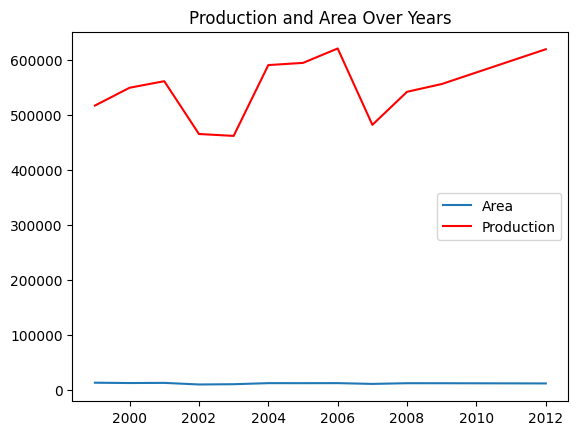

In [47]:
x_axis = data.Crop_Year
y_axis = data.Area
y1_axis = data.Production

plt.plot(x_axis, y_axis)
plt.plot(x_axis, y1_axis, color='r')

plt.title("Production and Area Over Years")
plt.legend(["Area", "Production"])
plt.show()


15. Random Forest Regressor:
#Random Forest Regression is an ensemble learning technique that combines the predictions of multiple decision trees to improve accuracy and reduce overfitting. 

In [63]:
x = data.index.values.reshape(-1, 1)
y = data['CPI'].values

regressor = RandomForestRegressor(n_estimators=12, random_state=0, n_jobs=1, verbose=13)
regressor.fit(x, y)
# code is preparing the data, creating a Random Forest Regression model, and then training the model with the specified features and target variable
#The model is trained to learn the relationship between the selected feature and the target variable (CPI). 

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

16. Predicting CPI Values with Random Forest:

In [64]:
y_pred = regressor.predict(x)


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


17. Plotting Predictions Over Actual Values:

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


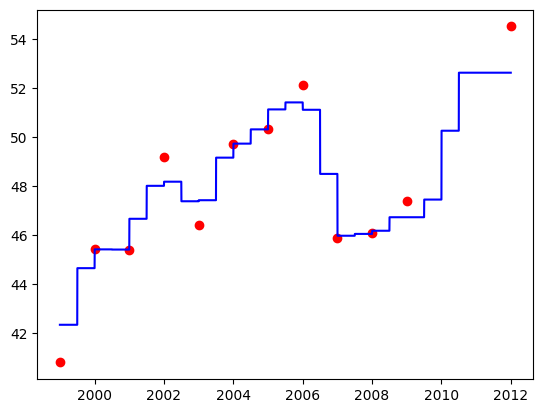

In [50]:
x_grid = np.arange(min(x), max(x), 0.001)
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color='r')
plt.plot(x_grid, regressor.predict(x_grid), color='b')

plt.show()


18. Plotting Actual vs Predicted Values:

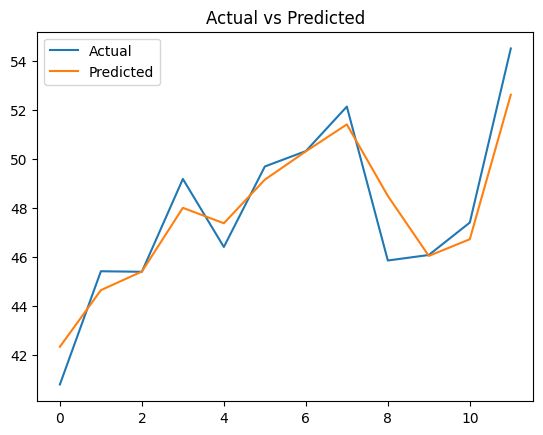

In [65]:
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis = dm.index
y_axis = dm.Actual
y1_axis = dm.Predicted

plt.plot(x_axis, y_axis)
plt.plot(x_axis, y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["Actual", "Predicted"])
plt.show()


19. Calculating Accuracy

In [66]:
accuracy = r2_score(dm['Actual'], dm['Predicted'])
print(f'R-squared (Accuracy): {accuracy}')

R-squared (Accuracy): 0.8822198132813032


20. Feature Importances Analysis

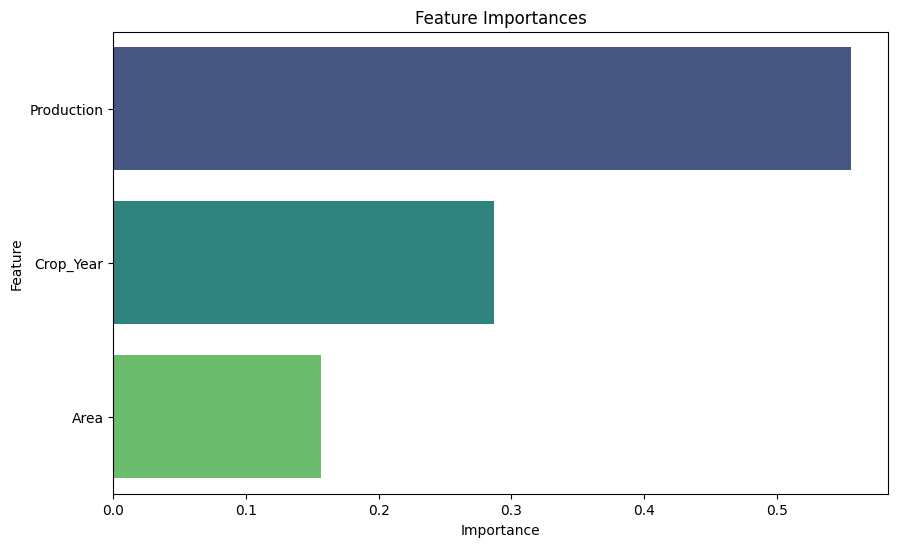

In [73]:
feature_importance_df = pd.DataFrame({
    'Feature': ['Production', 'Crop_Year', 'Area'],
    'Importance': [0.556194, 0.287019, 0.156787]
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



21. Error Analysis

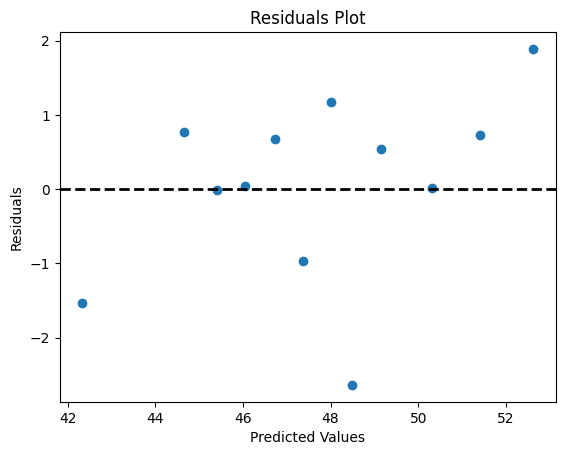

In [75]:
# to identify instances with high residuals, analyze those instances, and provide insights into potential issues or outliers
# residuals, or prediction errors, are the differences between the observed (actual) values and the values predicted by a model
# Assuming 'y_test' and 'y_pred' are your actual and predicted values
residuals = y - y_pred
# Scatter plot of predicted vs residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

22. Identify instances with high residuals

In [76]:
threshold = 5  #  Sets threshold value to identify instances with residuals greater than this threshold.
high_error_indices = np.abs(residuals) > threshold # Creates a boolean array where True indicates instances with high residuals
high_error_instances = data.iloc[high_error_indices] #Retrieves the instances with high residuals from the original dataset

# Use your trained model to get feature importances for these instances
high_error_feature_importances = regressor.feature_importances_ #Retrieves the feature importances from the trained model for instances with high residuals
print("Feature Importances for High Error Instances:")
for feature, importance in zip(data.columns, high_error_feature_importances):
    print(f"{feature}: {importance}")

Feature Importances for High Error Instances:
Crop_Year: 1.0


Errors are primarily influenced by variations in the crop year.

Conclusion:
This project showcased the power of Random Forest Regression in predicting the Crop Performance Index (CPI) with an impressive 88.2% accuracy. We delved deeper into understanding the key factors influencing CPI values through feature importance analysis. The journey concluded with adept error handling, ensuring the robustness of our predictions.